# Prediction Phone Price range using Machine Learning.

This notebook looks into using various Python-based ML and Data Science libraries in an attempt to build a machine learning model capable of predicting the price range of a phone as either high, cheap or expensive

The following approach will be taken:

1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination
In a statement,

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the pr
ice is
## 2. Data
    The original data comes from Kaggle Machine learning Repo.

    It can be found at this link: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

## 3. Evaluation
    > If we can reach 96% accuracy at predicting the price range of mobile phones during the proof of concept, we'll persue the project.

## 4. Features
    This is where you will get different information about each of the features in our data.
        Create data dicti    onary
  battery_power: Total battery capacity of the mobile phone (measured in mAh).
                        
blue: Indicates whether the phone has Bluetooth capability (1 = Yes, 0 = No).            
            
clock_speed: Processor clock speed (measured in GHz)            
            .
dual_sim: Indicates if the phone supports dual SIM cards (1 = Yes, 0 = No            
            ).
fc: Front camera resolution (measured in megapixel            
            s).
four_g: Indicates whether the phone supports 4G connectivity (1 = Yes, 0 =             
            No).
int_memory: Internal memory capacity (measured in            
             GB).
m_dep: Mobile depth (measured i            
            n mm).
mobile_wt: Weight of the mobile phone (measured in             
            grams).
n_cores: Number of processo            
            r cores.
pc: Primary camera resolution (measured in meg            
            apixels).
px_height: Height of the mobile phone screen resolution (measured i            
            n pixels).
px_width: Width of the mobile phone screen resolution (measured             
            in pixels).
ram: Random Access Memory capacity (meas            
            ured in MB).
sc_h: Screen height (measure            
            d in inches).
sc_w: Screen width (measur            
            ed in inches).
talk_time: Maximum talk time (meas            
            
            ured in hours).
three_g: Indicates whether the phone supports 3G connectivity (1            
             = Yes, 0 = No).
touch_screen: Indicates if the phone has a touch screen (            
            1 = Yes, 0 = No).
wifi: Indicates whether the phone has Wi-Fi capability             
            (1 = Yes, 0 = No).
price_range: Price category of the phone (encoded as integers, typically representing dif
            
                0: Low price (e.g., $0 - $150)                
                
1: Medium price (e.g., $150 - $300)                
                
2: High price (e.g., $300 - $600                
                )
3: Very high price (e.g., $600 and above)ferent price tiers).      

## Preparing the tools.
We're going to use pandas, Matplotlib and Numpy for data analysis and Manipulation

We will use sklearn to build our model

In [1]:
# import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#we want our plot appear inside notebook
%matplotlib inline


# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load our Data

In [2]:
df = pd.read_csv("train.csv")
df.shape

(2000, 21)

# Data Exploration (Exploratory data analysis or EDA)

The aim is to find out more about our data and be verse with what we are working on. we will elaborate on the following.
1. What question(s) are we trying to solve ?.
2. What kind of data do we have and how do we treat different types ?.
3. What's missing from the data and how do we deal with it ?.
4. Do we have outliers and do we care about them ?.
5. How can we add, remove feeatures to get more out of our data ?.

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.price_range.isnull().sum()

0

In [7]:
df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

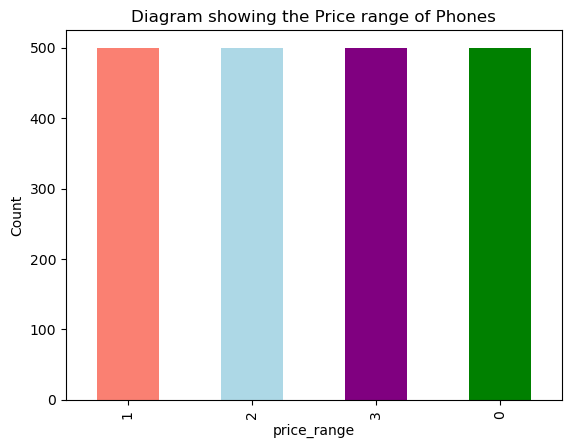

In [8]:
df["price_range"].value_counts().plot(
    kind="bar",
    color=["salmon", "lightblue", "purple", "green"]
)
plt.ylabel("Count")
plt.title("Diagram showing the Price range of Phones");

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Price Range according to Dual Sim

In [12]:
df["dual_sim"].value_counts()

dual_sim
1    1019
0     981
Name: count, dtype: int64

In [14]:
pd.crosstab(df["price_range"], df["dual_sim"])

dual_sim,0,1
price_range,,
0,250,250
1,245,255
2,251,249
3,235,265


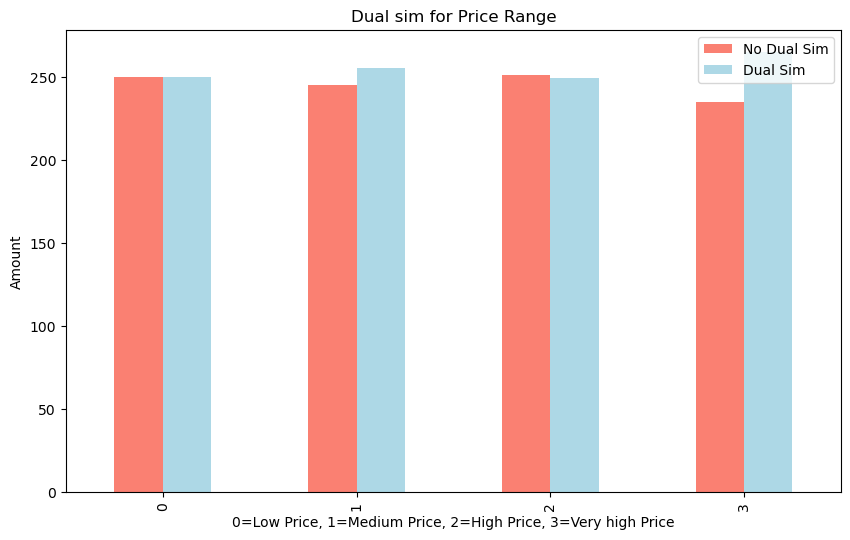

In [16]:
pd.crosstab(df["price_range"], df["dual_sim"]).plot(
    kind="bar",
    figsize=(10,6),
    color=["salmon", "lightblue"]
)
plt.title("Dual sim for Price Range")
plt.xlabel("0=Low Price, 1=Medium Price, 2=High Price, 3=Very high Price")
plt.ylabel("Amount")
plt.legend(["No Dual Sim","Dual Sim"]);

## Price Range according to Bluetooth

In [21]:
df["blue"].value_counts()
pd.crosstab(df["price_range"], df["blue"])

blue,0,1
price_range,,
0,257,243
1,255,245
2,257,243
3,241,259


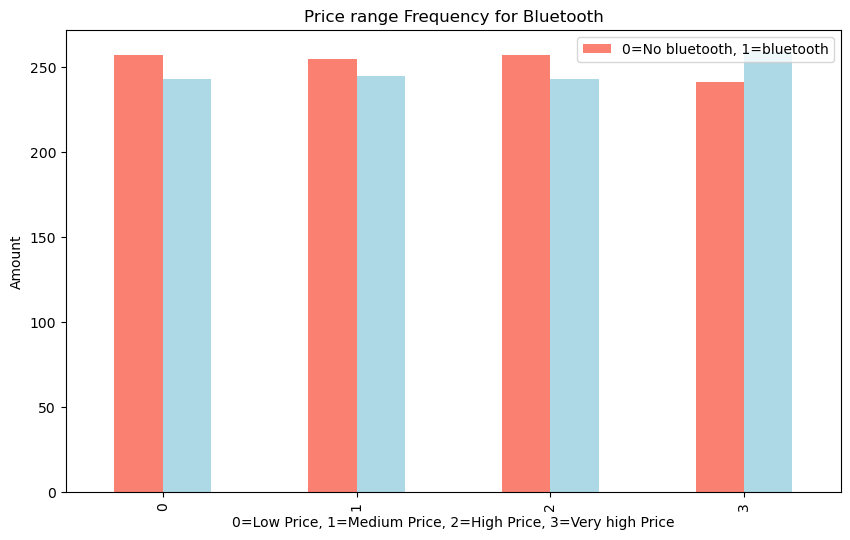

In [20]:
pd.crosstab(df["price_range"], df["blue"]).plot(
    kind="bar",
    figsize=(10,6),
    color=["salmon", "lightblue"]
)
plt.title("Price range Frequency for Bluetooth")
plt.xlabel("0=Low Price, 1=Medium Price, 2=High Price, 3=Very high Price")
plt.ylabel("Amount")
plt.legend(["0=No bluetooth, 1=bluetooth"]);

## Price Range according to Four G connectivity

In [22]:
df["four_g"].value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

In [23]:
pd.crosstab(df["price_range"], df["four_g"])

four_g,0,1
price_range,,
0,241,259
1,238,262
2,253,247
3,225,275


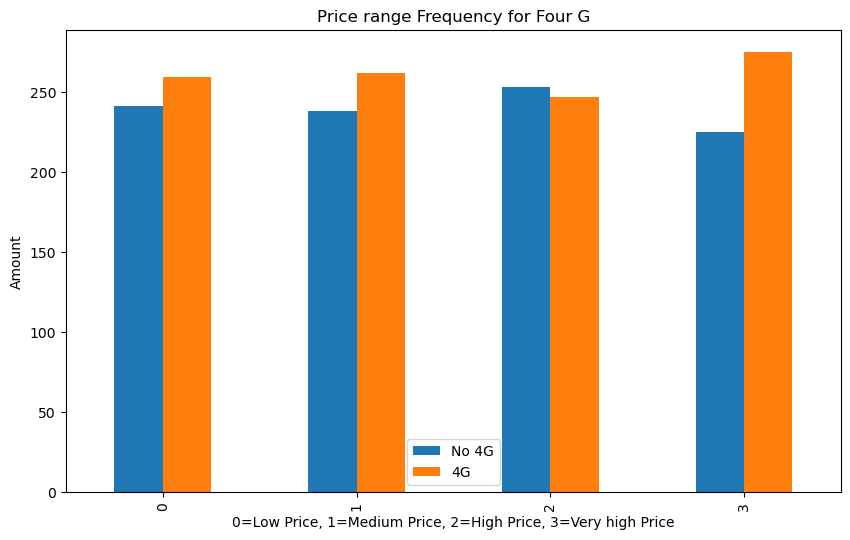

In [24]:
pd.crosstab(df["price_range"], df["four_g"]).plot(
    kind="bar",
    figsize=(10,6)
)
plt.title("Price range Frequency for Four G")
plt.xlabel("0=Low Price, 1=Medium Price, 2=High Price, 3=Very high Price")
plt.ylabel("Amount")
plt.legend(["No 4G", "4G"]);

In [25]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Price range according to 3G connectivity

In [27]:
df.three_g.value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

In [28]:
pd.crosstab(df["price_range"], df["three_g"])

three_g,0,1
price_range,,
0,127,373
1,122,378
2,113,387
3,115,385


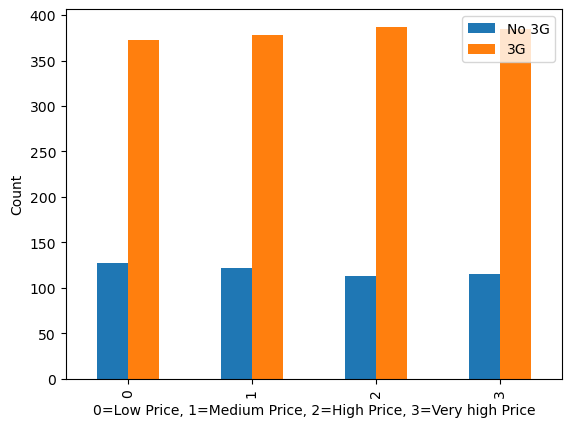

In [29]:
pd.crosstab(df["price_range"], df["three_g"]).plot(
    kind="bar"
)
plt.xlabel("0=Low Price, 1=Medium Price, 2=High Price, 3=Very high Price")
plt.ylabel("Count")
plt.legend(["No 3G", "3G"])

In [ ]:
## Clock speed Vs.Price Range

In [30]:
df.clock_speed

0       2.2
1       0.5
2       0.5
3       2.5
4       1.2
       ... 
1995    0.5
1996    2.6
1997    0.9
1998    0.9
1999    2.0
Name: clock_speed, Length: 2000, dtype: float64

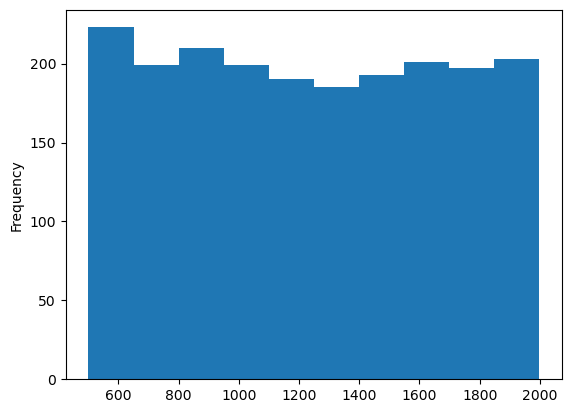

In [31]:
# Checking the distribution of battery_power

df["battery_power"].plot(
    kind="hist"
);

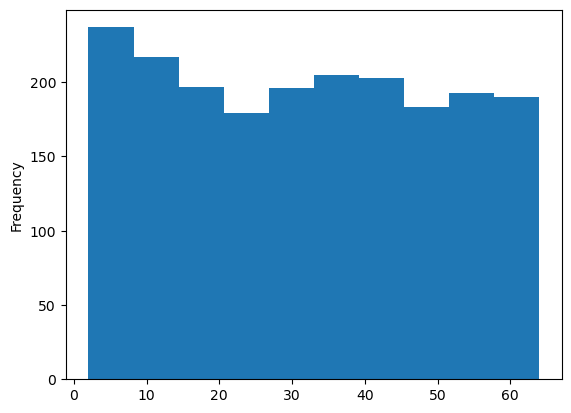

In [35]:
df["int_memory"].plot(
    kind="hist"
);

In [36]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


(21.5, -0.5)

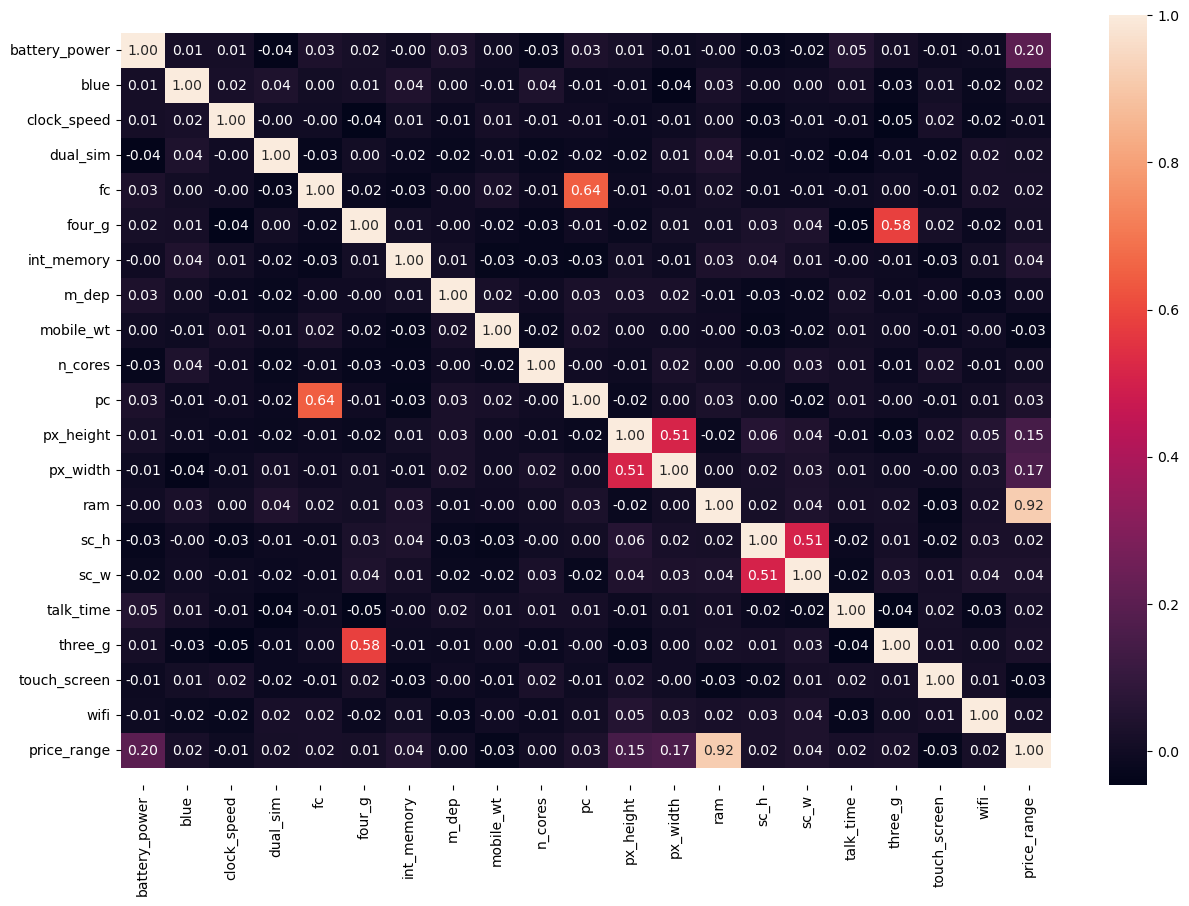

In [37]:
# diagramatically creating our corr using heatmap seaborn

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f"
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)